# Exercises

## Acquire 

### Zillow
**For the following, iterate through the steps you would take to create functions: Write the code to do the following in a jupyter notebook, test it, convert to functions, then create the file to house those functions.**

**You will have a** 
`zillow.ipynb` 
**file and a helper file for each section in the pipeline.**

In [1]:
###############################################################################
### python imports                                                          ###
###############################################################################

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #; sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# from math import sqrt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer, RobustScaler, MinMaxScaler


import warnings
warnings.filterwarnings("ignore")

# from math import sqrt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import dfo

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score
import graphviz

from graphviz import Graph

In [3]:
from math import sqrt
from scipy import stats

In [4]:
###############################################################################
### local imports                                                           ###
###############################################################################

import acquire as acq
import prepare as prep
import clusterfunctions as cf
import explore as xplr

from debug import local_settings, timeifdebug, timeargsifdebug, frame_splain
from dfo import DFO, set_dfo
from prepare import convert_to_dates, get_column_values_stats, retype_cols, remove_cols, nulls_by_row

In [5]:
local_settings.splain=True
local_settings.debug=True
splain = local_settings.splain
debug = local_settings.debug

In [6]:
import evaluate as p_eval

In [7]:
from wrangle_zillow import get_zillow_data, get_zillow_local_data, prep_zillow_data, sqls, keep_cols

#### Acquire & Summarize

1. **Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.**

   - *Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for* 
`airconditioningtypeid`
*.*
   - Only include properties with a transaction in 2017, and include only the last transaction for each properity (so no duplicate property ID's), along with zestimate error and date of transaction.
   - Only include properties that include a latitude and longitude value.

In [8]:
# dfo = set_dfo(get_zillow_data(sql=sqls['mvp']), splain=True)
dfo = set_dfo(get_zillow_local_data(csv='zillow_local_mvp.csv'), splain=True)

2019-11-11 20:25:29 starting get_zillow_local_data
2019-11-11 20:25:29 starting csv_df
2019-11-11 20:25:29 starting check_df
2019-11-11 20:25:29 starting frame_splain
DATAFRAME SHAPE:
(52089, 11) 

DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52089 entries, 0 to 52088
Data columns (total 11 columns):
id                              52089 non-null int64
parcelid                        52089 non-null int64
bathroomcnt                     52089 non-null float64
bedroomcnt                      52089 non-null float64
calculatedfinishedsquarefeet    52089 non-null float64
fips                            52089 non-null float64
latitude                        52089 non-null float64
longitude                       52089 non-null float64
structuretaxvaluedollarcnt      52089 non-null float64
structuredollarpersqft          52089 non-null float64
logerror                        52089 non-null float64
dtypes: float64(9), int64(2)
memory usage: 4.4 MB
None 

DATAFRAME DESCRIPTI

2. **Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.).**

In [9]:
df = dfo.df
df = remove_cols(df, ['Unnamed: 0', 'id'])
dfo.index_columns = 'parcelid'
df = df.set_index(dfo.index_columns)
dfo.y_column = 'logerror'
y_col = 'y'
df = df.rename(columns={dfo.y_column: 'y'})
dfo.stratify = 'fips'
frame_splain(df, title='Zillow Data', splain=True)

2019-11-11 20:25:29 starting remove_cols
2019-11-11 20:25:29 ending remove_cols ; time: 0:00:00.002782
2019-11-11 20:25:29 starting frame_splain
ZILLOW DATA SHAPE:
(52089, 9) 

ZILLOW DATA INFO:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 52089 entries, 14297519 to 12826780
Data columns (total 9 columns):
bathroomcnt                     52089 non-null float64
bedroomcnt                      52089 non-null float64
calculatedfinishedsquarefeet    52089 non-null float64
fips                            52089 non-null float64
latitude                        52089 non-null float64
longitude                       52089 non-null float64
structuretaxvaluedollarcnt      52089 non-null float64
structuredollarpersqft          52089 non-null float64
y                               52089 non-null float64
dtypes: float64(9)
memory usage: 4.0 MB
None 

ZILLOW DATA DESCRIPTION:
                                count          mean            std  \
bathroomcnt                   52089.0  2.305669e+0

In [10]:
date_columns = ['transactiondate']
df = convert_to_dates(df, cols=date_columns)
dfo.stratify= 'fips'
df.head(15)

2019-11-11 20:25:29 starting convert_to_dates
2019-11-11 20:25:29 ending convert_to_dates ; time: 0:00:00.000590


,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,structuretaxvaluedollarcnt,structuredollarpersqft,y
parcelid,,,,,,,,,
14297519,3.5,4.0,3100.0,6059.0,33634931.0,-117869207.0,485713.0,156.681613,0.025595
17052889,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,88000.0,60.068259,0.055619
14186244,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,85289.0,68.615447,0.005383
12177905,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,108918.0,45.840909,-0.103410
12095076,3.0,4.0,2962.0,6037.0,34145202.0,-118179824.0,276684.0,93.411209,-0.001011
12069064,1.0,2.0,738.0,6037.0,34149214.0,-118239357.0,18890.0,25.596206,0.101723
12790562,3.0,4.0,3039.0,6037.0,33960230.0,-118006914.0,177527.0,58.416255,-0.040966
11104527,3.0,4.0,2540.0,6037.0,34434971.0,-118464390.0,271715.0,106.974409,0.005963
13944538,2.5,3.0,1340.0,6059.0,33771438.0,-117982834.0,96617.0,72.102239,0.045602


In [11]:
frame_splain(df, splain=True)

2019-11-11 20:25:29 starting frame_splain
DATAFRAME SHAPE:
(52089, 9) 

DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 52089 entries, 14297519 to 12826780
Data columns (total 9 columns):
bathroomcnt                     52089 non-null float64
bedroomcnt                      52089 non-null float64
calculatedfinishedsquarefeet    52089 non-null float64
fips                            52089 non-null float64
latitude                        52089 non-null float64
longitude                       52089 non-null float64
structuretaxvaluedollarcnt      52089 non-null float64
structuredollarpersqft          52089 non-null float64
y                               52089 non-null float64
dtypes: float64(9)
memory usage: 4.0 MB
None 

DATAFRAME DESCRIPTION:
                                count          mean            std  \
bathroomcnt                   52089.0  2.305669e+00       1.017265   
bedroomcnt                    52089.0  3.309912e+00       0.933453   
calculatedfinisheds

**Find string categoricals**

In [12]:
df_strings = get_column_values_stats(
    df, 
    get_cols=df.columns[df.dtypes=='object'],
    max_uniques=20000,
    limit_to_max=True
)
df_strings.index

2019-11-11 20:25:29 starting get_column_values_stats
2019-11-11 20:25:29 ending get_column_values_stats ; time: 0:00:00.114727


Index(['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fips'], dtype='object', name='cols')

In [13]:
string_categoricals = [
    'airconditioningdesc', 
    'architecturalstyledesc', 
    'buildingclassdesc', 
    'county', 
    'state', 
    'heatingorsystemdesc', 
    'propertycountylandusecode', 
    'propertylandusedesc', 
    'propertyzoningdesc', 
    'storydesc', 
    'taxdelinquencyflag', 
    'typeconstructiondesc'
]

In [14]:
df = retype_cols(df, cols=string_categoricals, to_dtype='category')
df.info()

2019-11-11 20:25:30 starting retype_cols
2019-11-11 20:25:30 ending retype_cols ; time: 0:00:00.005163
<class 'pandas.core.frame.DataFrame'>
Int64Index: 52089 entries, 14297519 to 12826780
Data columns (total 9 columns):
bathroomcnt                     52089 non-null float64
bedroomcnt                      52089 non-null float64
calculatedfinishedsquarefeet    52089 non-null float64
fips                            52089 non-null float64
latitude                        52089 non-null float64
longitude                       52089 non-null float64
structuretaxvaluedollarcnt      52089 non-null float64
structuredollarpersqft          52089 non-null float64
y                               52089 non-null float64
dtypes: float64(9)
memory usage: 4.0 MB


**Find Numeric Categoricals**

In [15]:
df_cat_check = prep.get_column_values_stats(
    df, 
    get_cols=df.columns[df.dtypes!='category'],
    max_uniques=750000,
    target_col=dfo.y_column,
    limit_to_max=True
)
df_cat_check.index

2019-11-11 20:25:30 starting get_column_values_stats
2019-11-11 20:25:30 ending get_column_values_stats ; time: 0:00:00.078485


Index(['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fips',
       'latitude', 'longitude', 'structuretaxvaluedollarcnt',
       'structuredollarpersqft', 'y'],
      dtype='object', name='cols')

In [16]:
numeric_categoricals = [
    'airconditioningtypeid', 
    'architecturalstyletypeid', 
    'buildingclasstypeid', 
    'buildingqualitytypeid',
    'decktypeid', 
    'fips', 
    'hashottuborspa',
    'heatingorsystemtypeid',
    'pooltypeid10', 
    'pooltypeid2', 
    'pooltypeid7', 
    'propertylandusetypeid',
    'regionidcounty', 
    'regionidcity',
    'regionidneighborhood',
    'regionidzip',
    'rawcensustractandblock',
    'censustractandblock',
    'storytypeid', 
    'threequarterbathnbr', 
    'numberofstories', 
    'fireplaceflag', 
    'assessmentyear', 
    'typeconstructiontypeid', 
    'transactions'
]

In [17]:
df = retype_cols(df, cols=numeric_categoricals, to_dtype='category')
nulls_by_row(df)

2019-11-11 20:25:30 starting retype_cols
2019-11-11 20:25:30 ending retype_cols ; time: 0:00:00.009194
2019-11-11 20:25:30 starting nulls_by_row
2019-11-11 20:25:30 ending nulls_by_row ; time: 0:00:00.034670


,num_cols_missing,pct_cols_missing,parcelid
0,0,0.0,52089


In [18]:
dfo.df = df
df=pd.DataFrame(df)

##### Baseline Model - will use bathroom count, bedroom count, and calculatedfinishedsquarefeet

In [19]:

feature_cols = df[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet']]
Xbase = feature_cols
#y= logerror
ybase = df.y

# Split data
X_trainbase, X_testbase, y_trainbase, y_testbase = train_test_split(Xbase, ybase, test_size=0.2, random_state=1)

# Instantiate model
lmbase = LinearRegression()

# Fit model
lmbase.fit(X_trainbase, y_trainbase)

# Predict
y_predbase = lmbase.predict(X_testbase)

# Predict Mean
y_mean = y_trainbase.mean()
X_trainbase['mean_y'] = y_mean
X_testbase['mean_y'] = y_mean

# RMSE
print('RMSE= ',np.sqrt(metrics.mean_squared_error(y_testbase, y_predbase)))


# RMSE
print('RMSE Mean_y= ',np.sqrt(metrics.mean_squared_error(y_testbase, X_testbase.mean_y)))




RMSE=  0.17811007166548018
RMSE Mean_y=  0.17829951577429268


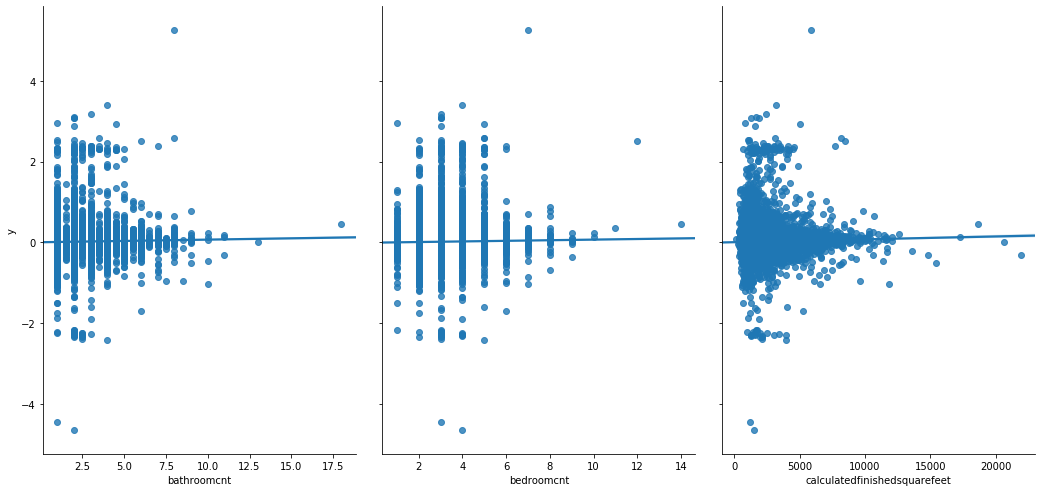

In [20]:
sns.pairplot(df, x_vars=['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet'], y_vars='y', size=7, aspect=0.7, kind='reg')

In [21]:
ols_modelbase = sm.OLS(y_trainbase, X_trainbase)
regbase = sm.OLS(ybase, Xbase).fit()
regbase.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.013
Model:                            OLS   Adj. R-squared (uncentered):              0.012
Method:                 Least Squares   F-statistic:                              220.1
Date:                Mon, 11 Nov 2019   Prob (F-statistic):                   6.65e-142
Time:                        20:25:39   Log-Likelihood:                          16635.
No. Observations:               52089   AIC:                                 -3.326e+04
Df Residuals:                   52086   BIC:                                 -3.324e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
bathroomcnt                  -1.241e-05      0.001     -0.008      0.993      -0.003       0.003
bedroomcnt                       0.0029      0.001      3.968      0.000       0.001       0.004
calculatedfinishedsquarefeet  4.677e-06   1.48e-06      3.152      0.002    1.77e-06    7.58e-06
==============================================================================
Omnibus:                    49991.743   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         27205876.849
Skew:                           3.820   Prob(JB):                         0.00
Kurtosis:                     114.699   Cond. No.                     4.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Our overall baseline error- 

###### More Prep fro Clustering

In [22]:
df = retype_cols(df, cols=numeric_categoricals, to_dtype='category')
nulls_by_row(df)

2019-11-11 20:25:39 starting retype_cols
2019-11-11 20:25:39 ending retype_cols ; time: 0:00:00.001594
2019-11-11 20:25:39 starting nulls_by_row
2019-11-11 20:25:39 ending nulls_by_row ; time: 0:00:00.034805


,num_cols_missing,pct_cols_missing,parcelid
0,0,0.0,52089


In [23]:
dfo.df = df

In [24]:
dfo = prep.split_dfo(
    dfo, 
    train_pct=.7, 
    randomer=12345, 
    stratify=dfo.stratify, 
    drop_cols={'id'}, 
    splain=local_settings.splain
)

2019-11-11 20:25:39 starting split_dfo
2019-11-11 20:25:39 starting remove_cols
2019-11-11 20:25:39 ending remove_cols ; time: 0:00:00.000282
2019-11-11 20:25:39 starting split_my_data_whole
2019-11-11 20:25:39 ending split_my_data_whole ; time: 0:00:00.012646
2019-11-11 20:25:39 starting frame_splain
DFO TRAIN SHAPE:
(39066, 9) 

DFO TRAIN INFO:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 39066 entries, 12709284 to 11344051
Data columns (total 9 columns):
bathroomcnt                     39066 non-null float64
bedroomcnt                      39066 non-null float64
calculatedfinishedsquarefeet    39066 non-null float64
fips                            39066 non-null category
latitude                        39066 non-null float64
longitude                       39066 non-null float64
structuretaxvaluedollarcnt      39066 non-null float64
structuredollarpersqft          39066 non-null float64
y                               39066 non-null float64
dtypes: category(1), float64(8)
memor

In [26]:
dfo.train = remove_cols(dfo.train, [dfo.stratify])

2019-11-11 20:27:43 starting remove_cols
2019-11-11 20:27:43 ending remove_cols ; time: 0:00:00.002187


In [27]:
dfo.test = remove_cols(dfo.test, [dfo.stratify])


2019-11-11 20:27:44 starting remove_cols
2019-11-11 20:27:44 ending remove_cols ; time: 0:00:00.001930


In [32]:
train = dfo.train
test = dfo.test
dfo.yhat = dfo.train.y.mean()
dfo.ystd = dfo.train.y.std()
dfo.yhat
dfo.train['yhat'] = dfo.yhat
dfo.test['yhat'] = dfo.yhat

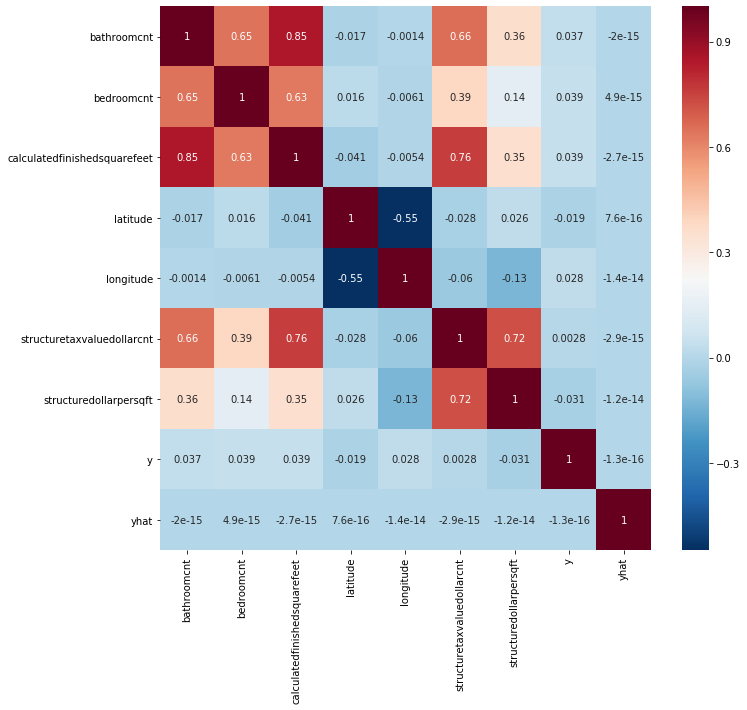

In [33]:
plt.figure(figsize=(11,10))
cor = train.corr()
plot = sns.heatmap(cor, annot=True, cmap=plt.cm.RdBu_r)

In [34]:
dfo.X_train, dfo.y_train = prep.xy_df(dfo.train, y_col)

2019-11-11 20:29:43 starting xy_df
2019-11-11 20:29:43 starting frame_splain
2019-11-11 20:29:43 ending frame_splain ; time: 0:00:00.000298
2019-11-11 20:29:43 starting frame_splain
2019-11-11 20:29:43 ending frame_splain ; time: 0:00:00.000161
2019-11-11 20:29:43 ending xy_df ; time: 0:00:00.003998


In [43]:
X = dfo.X_train
y = dfo.y_train

In [44]:
dfo.X_test, dfo.y_test = prep.xy_df(dfo.test, y_col)
XT = dfo.X_test
yT = dfo.y_test

2019-11-11 20:33:00 starting xy_df
2019-11-11 20:33:00 starting frame_splain
2019-11-11 20:33:00 ending frame_splain ; time: 0:00:00.000150
2019-11-11 20:33:00 starting frame_splain
2019-11-11 20:33:00 ending frame_splain ; time: 0:00:00.000225
2019-11-11 20:33:00 ending xy_df ; time: 0:00:00.003123


In [50]:
clustered_cols = ['longitude', 'latitude', 'structuredollarpersqft']
c_col = ['cluster']
ignore_cols = ['structuretaxvaluedollarcnt']
non_cluster_cols = [col for col in X.columns if col not in cluster_cols + ignore_cols + cluster_col]

In [52]:
Xc = X[clustered_cols]
XTc = XT[clustered_cols]

##### Clustering
Now we will cluster our data set by location based variables: latitude, longtitude, and price per square foot

In [ ]:
# cf.compare_ks(Xc_scaled, min_k=4, max_k=18)

In [ ]:
Xc_scaled, Xc_kmeans = cf.set_kmeans_clusters(Xc_scaled, n_clusters=8, random_state=dfo.randomer)
Xc_scaled.head(15)

In [ ]:
@timeifdebug
def features_2d(df, c_col=None, **kwargs):
    
    cols = [col for col in df.columns if col != c_col]
    n = len(cols)
    grid = []
    for x in range(0, n-1):
        for y in range(x+1, n):
            line = [cols[x], cols[y]]
            grid.append(line)
    
    return_df = pd.DataFrame(grid, columns=['x_col', 'y_col'])
    if c_col:
        return_df['c_col'] = c_col
    return return_df



In [ ]:
@timeifdebug
def features_3d(df, c_col=None, **kwargs):
    
    cols = [col for col in df.columns if col != c_col]
    n = len(cols)
    grid = []
    for x in range(0, n-2):
        for y in range(x+1, n-1):
            for z in range(y+1, n):
                line = [cols[x], cols[y], cols[z]]
                grid.append(line)
    

    return_df = pd.DataFrame(grid, columns=['x_col', 'y_col', 'z_col'])
    if c_col:
        return_df['c_col'] = c_col
    return return_df



In [ ]:
# features_2d(Xc_scaled)

In [ ]:
features_cl = features_2d(Xc_scaled, c_col=cluster_col[0])
features_cl

In [ ]:
# features_3d(Xc_scaled, c_col=)

In [ ]:
# features_3d(X)

In [ ]:
@timeifdebug
def plot_features_2D(feature_df, df, x_col='x_col', y_col='y_col', c_col='c_col'):
    x_vals = feature_df[x_col]
    y_vals = feature_df[y_col]
    c_vals = feature_df[c_col]
    n = len(x_vals)
    for idx in range(0,n):
        plt.figure(figsize=(8,7))
        cf.plot_2d_clusters(
            df, 
            x_col=x_vals[idx], 
            y_col=y_vals[idx], 
            c_col=c_vals[idx], 
            alpha=.5, 
#             marker='x', 
#             s=250, 
#             c='black'
        )
        plt.show()

In [ ]:
plot_features_2D(features_cl, Xc_scaled)

In [ ]:
cluster_y = prep.df_join_xy(Xc_scaled[[cluster_col[0]]], y) 

In [ ]:
frame_splain(cluster_y, splain=True)

In [ ]:
c_col = cluster_col[0]
y_col = 'y'

In [ ]:
XncC = prep.df_join_xy(Xnc, Xc_scaled['cluster']) 
XncC.head()

In [ ]:
cluster_stats = cluster_y.groupby(c_col).y.agg(['count', 'mean', 'std']).reset_index()

In [ ]:
cluster_stats

In [ ]:
df_stats = y.agg(['count', 'mean', 'std'])
df_stats

In [ ]:
@timeifdebug
def bool_ttest_single_uniq(df, target_column='target', check_column='check', alpha=.05, **kwargs):

    p_list = []
    uniq_vals = sorted(df[check_column].unique())
    print(uniq_vals)
    #tgt_name = target_column
    #chk_name = check_column
    for val in uniq_vals:
        is_true = df[df[check_column] == val]
        num_true = len(is_true)
        y_if_true = is_true[target_column].mean()
        std_if_true = is_true[target_column].std()
        y_mean = df[target_column].mean()
        y_std = df[target_column].std()
        t, p = stats.ttest_1samp(is_true[target_column], df[target_column].mean())
        p_list.append([check_column, val, num_true, t, p, p<alpha, y_if_true, y_mean, std_if_true, y_std])
    df_p = (pd.DataFrame(
        p_list, 
        columns=[
            'column','value','count','t_stat','p_value','is_sig',
            target_column+'_if_value',target_column+'_mean',
            'std_if_value','std_all'])
        .set_index(['value'])
            .sort_values(by='p_value'))
    return df_p


In [ ]:
tc = bool_ttest_single_uniq(cluster_y, target_column='y', check_column=c_col, alpha=.05, debug=True)

In [ ]:
tc

In [ ]:
tctrue = sorted(tc[tc.is_sig].index)
tctrue

In [ ]:
for tcval in tctrue:
    XncC['c' + str(tcval)] = XncC.cluster == tcval
    
XncC.head()

In [ ]:
XncCs = XncC.drop(columns='cluster')
XncCs.head(15)

In [ ]:
if 'prediction' in XncCs.columns:
    XncCs = XncCs.drop(columns='prediction')

In [ ]:
dtr = DecisionTreeRegressor(
    max_depth=9,
    random_state=dfo.randomer,
    min_samples_leaf=3,
    max_leaf_nodes=None
)
dtr.fit(XncCs, y)
#clf = clf.fit(XncCs, dfo.y_column)


#dot_data = export_graphviz(clf, out_file=None) 
#graph = graphviz.Source(dot_data) 

#graph.render('iris_decision_tree', view=True)

In [ ]:
# cross_val_score(dtr, XncCs, y, cv=10)


In [ ]:
dtr_score_ = dtr.score(XncCs, y)
dtr_score_

In [ ]:
dtr_pred_ = dtr.predict(XncCs)

In [ ]:
Xp = XncCs[XncCs.columns]

In [ ]:
Xp = Xp.join(y)
Xp.head()

In [ ]:
Xp['pred_dtr'] = dtr_pred_
Xp.head()

In [ ]:
dtr.get_params()

In [ ]:
bl_errors = p_eval.regression_errors(Xp.y, Xp.yhat)
print(bl_errors)
dtr_errors = p_eval.regression_errors(Xp.y, Xp.pred_dtr)
print(dtr_errors)


In [ ]:
y.std()

In [ ]:
bl_errors['RMSE']/y.std()

In [ ]:
dtr_errors['RMSE']/y.std()